In [12]:
from matplotlib import pyplot as plt
import numpy as np
import cv2




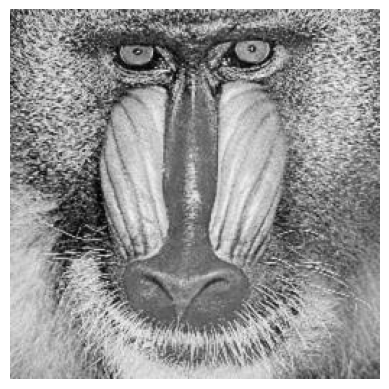

(256, 256)

In [13]:
img=cv2.imread('Mandrill.png',0)
plt.imshow(img,cmap='gray')
plt.axis('off')
plt.show()
img.shape



In [14]:
def window_size(sigma):
    w_s = np.ceil(6*sigma)
    if w_s % 2 == 0:
        w_s += 1
    return int(w_s)

In [15]:
def gaussian_kernel(sigma):
    w_s = window_size(sigma)
    d = w_s//2
    blur_kernel = np.zeros((w_s, w_s))


    for i in range(w_s):
        for j in range(w_s):
            blur_kernel[i, j] = (1/(2*np.pi*sigma**2))*(np.exp((-(i-d)**2-(j-d)**2)/(2*(sigma**2))))
    blur_kernel = blur_kernel/np.sum(blur_kernel)
    return blur_kernel

In [16]:
def zero_padded(image,w_s):
    x,y=image.shape
    d=w_s//2
    zero_padded_image = np.zeros((x+2*d, y+2*d))
    zero_padded_image[d:-d, d:-d] = image
    return zero_padded_image

In [17]:
def convolution(image, sigma):
    x, y = image.shape
    w_s = window_size(sigma)
    d = w_s//2

    if d == 0:
        return image

    padded_image = zero_padded(image, w_s)
    blur_kernel = gaussian_kernel(sigma)



    final_image = np.zeros((x, y))
    for i in range(d, x+d):
        for j in range(d, y+d):
            patch = padded_image[i-d:i+d+1, j-d:j+d+1] # Extract the required image patch
            final_image[i-d, j-d] = np.sum(blur_kernel*patch)# multiply it with the kernel and sum up the values
                                                             # store it in the final image array
    return final_image
sigmas = np.array([1.6, 1.2, 1.0, 0.6, 0.3, 0.0])

# Blur the `mandrill` image using i-th sigma
blurr_image=[]
for i in range(6):
    blurred_image = convolution(img,sigmas[i])
    blurr_image.append(blurred_image)

In [18]:
def plotter(image, title):
    plt.figure()
    plt.imshow(image, 'gray')
    plt.show()


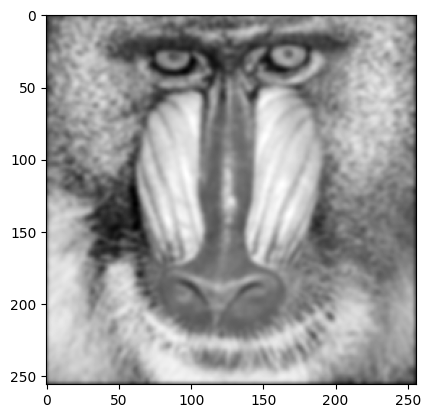

In [19]:
plotter(blurr_image[0], "Difference btween two images")


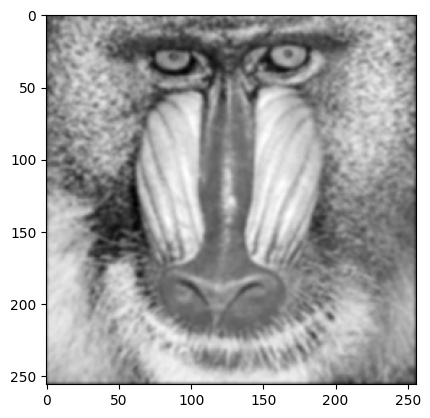

In [20]:
plotter(blurr_image[1], "Difference btween two images")


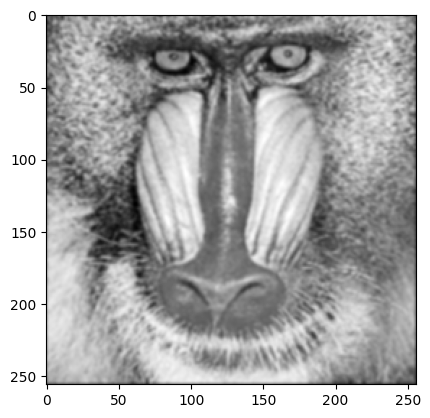

In [21]:
plotter(blurr_image[2], "Difference btween two images")


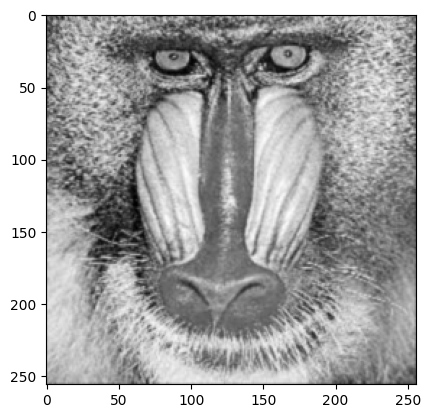

In [22]:
plotter(blurr_image[3], "Difference btween two images")


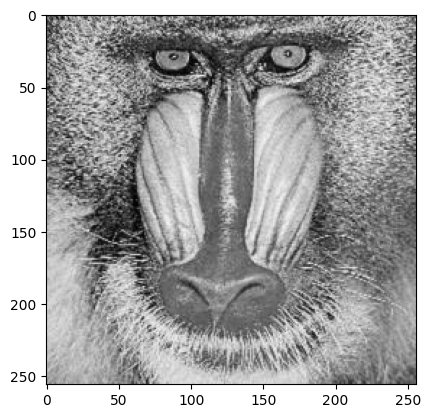

In [23]:
plotter(blurr_image[4], "Difference btween two images")


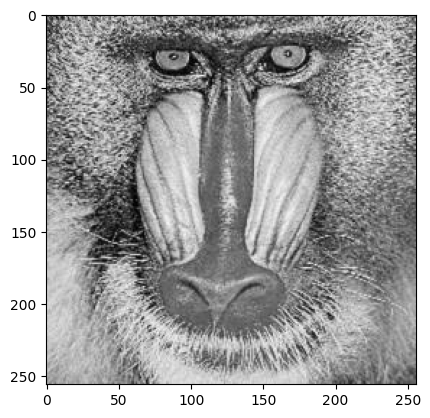

In [24]:
plotter(blurr_image[5], "Difference btween two images")